# Kaggle: House Prices: Advanced Regression Techniques - ANALYSIS 2 (Prediction)

__Predict sales prices and practice feature engineering, RFs, and gradient boosting__

![](https://camo.githubusercontent.com/1721729c963e9c92788c73c8e1d38661cf377eed/68747470733a2f2f7777772e7265616c657374617465636f6e73756c74696e672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f424d49466561747572652d57686572652d4172652d57652d496e2d486f7573696e672d4379636c652e706e67)


[Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

#### Objective  - build most predictive model for sales price of homes (limited to techniches learning in MSDS class)
Produce the following modesl (4):
1. Foward Selection
2. Backward elimination
3. Stepwise selection
4. Custom built

Generate:
- Adjusted R2
- CV Press
- Kaggle Score

### Imports

In [72]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical computation library

# Display up to 90 columns of a dataframe
pd.set_option('display.max_columns', 90)

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
df = pd.read_csv("./train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


__Data Quality Check__

lets check the columns that contain NaN value

In [74]:
print(df.columns[df.isnull().any()].tolist())
fake = pd.DataFrame(df.isnull().sum())
fake[fake[0].values > 0]

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [75]:
fake = df.columns[df.isnull().any()].tolist()
for col in fake:
    print(col, "\n", df[col].unique(),"\n")

LotFrontage 
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

Alley 
 [nan 'Grvl' 'Pave'] 

MasVnrType 
 ['BrkFace' 'None' 'Stone' 'BrkCmn' nan] 

MasVnrArea 
 [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+

In [76]:
print(fake)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [77]:
# replace null values with the median value
df.LotFrontage.fillna((df.LotFrontage.median()), inplace=True)
df.MasVnrArea.fillna((df.MasVnrArea.median()), inplace=True)
df.GarageYrBlt.fillna((df.GarageYrBlt.median()), inplace=True)

# replace null categories with character "missing"
cat_missing_var = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                   'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for cat in cat_missing_var:
    df[cat].fillna("missing", inplace=True)


### One Hot Encoding Categorical Variables

In [78]:
def category_view(df, variable):
    fig = plt.figure()   
    fig = sns.countplot(variable)
    print(variable.describe())
    print(variable.unique())
    print("number of categories: ", len(variable.unique()))
    #var_name = (variable.name + str(len(variable.unique())))
    #print(var_name)
    
    # dummy_na = True; Treat Nulls/NaNs as a separate category
    dummy = pd.get_dummies(variable, prefix_sep='' ,prefix=variable.name, dummy_na = variable.isnull().any(),
                               drop_first=False)
    # drop last column
    dummy = dummy[dummy.columns[:-1]]
    df = pd.concat([df, dummy], axis = 1)
    return df
    

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
['RL' 'RM' 'all' 'FV' 'RH']
number of categories:  5
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
number of categories:  15
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
['Pave' 'Grvl']
number of categories:  2
count        1460
unique          3
top       missing
freq         1369
Name: Alley, dtype: object
['missing' 'Grvl' 'Pave']
number of categories:  3
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
['Lvl' 'Bnk' 'Low' 'HLS']
number of categories:  4
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
['AllPub' 'NoSeWa']
number of categories:  2
c

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
number of categories:  6
count     1460
unique       5
top         TA
freq       649
Name: BsmtQual, dtype: object
['Gd' 'TA' 'Ex' 'missing' 'Fa']
number of categories:  5
count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
number of categories:  6
count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object
['Ex' 'Gd' 'TA' 'Fa' 'Po']
number of categories:  5
count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object
['Y' 'N']
number of categories:  2
count      1460
unique        6
top       SBrkr
freq       1334
Name: Electrical, dtype: object
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'missing']
number of categories:  6
count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dty

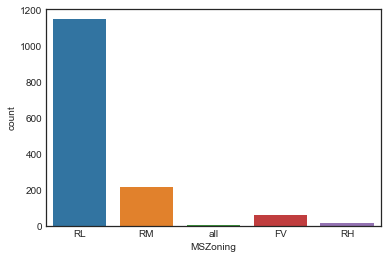

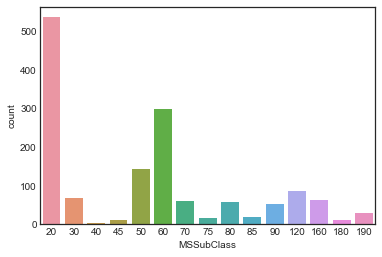

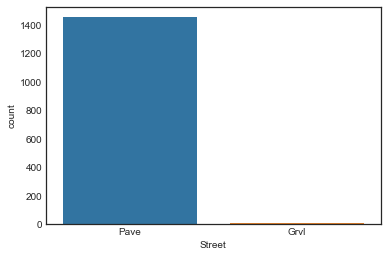

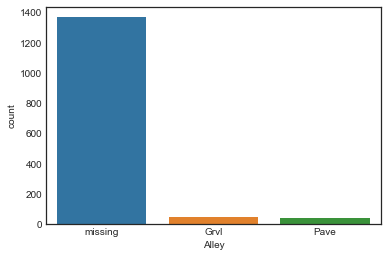

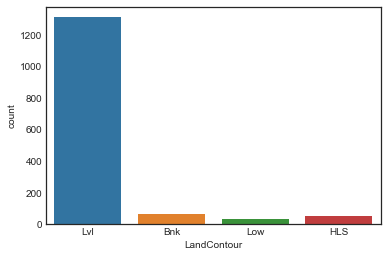

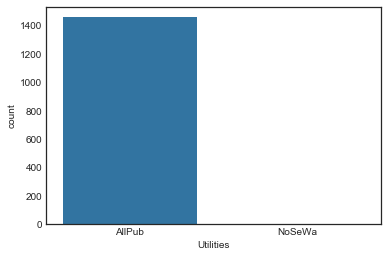

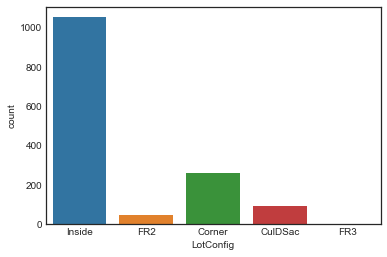

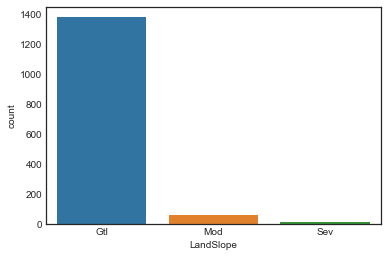

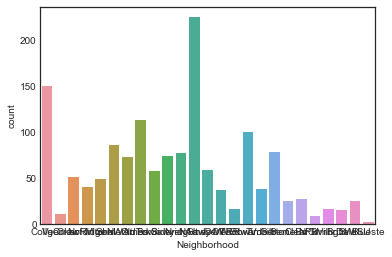

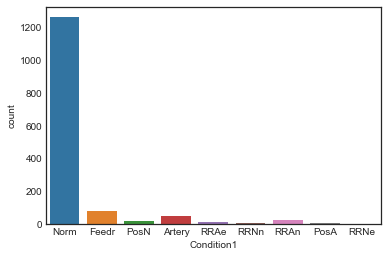

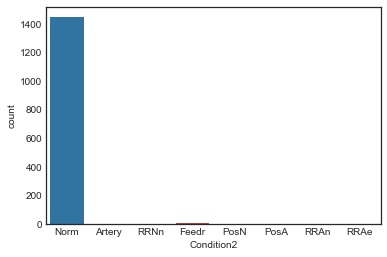

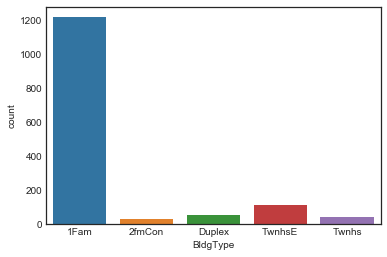

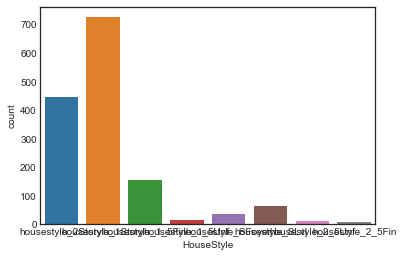

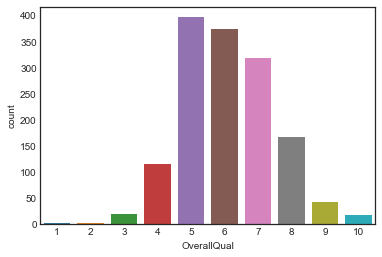

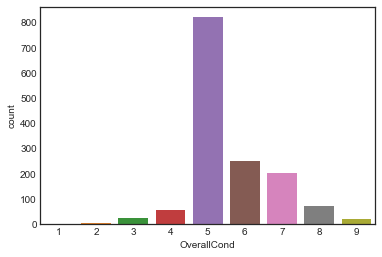

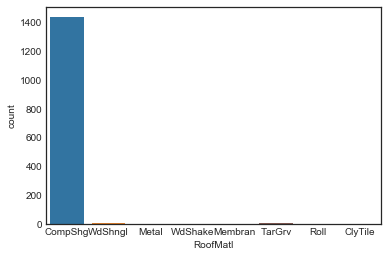

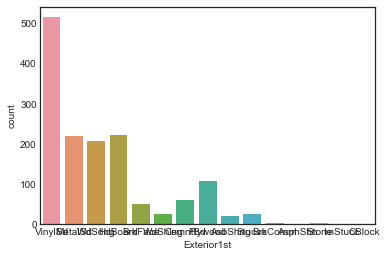

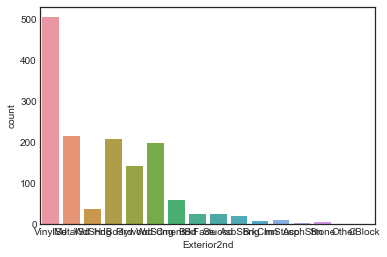

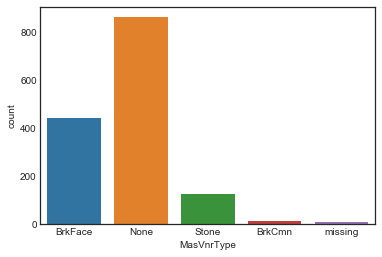

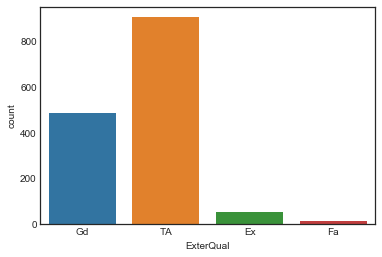

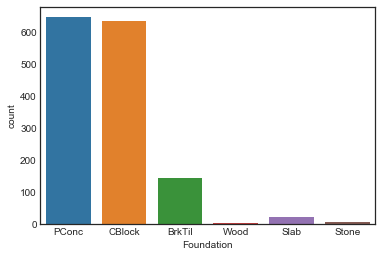

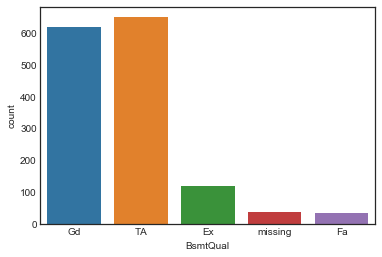

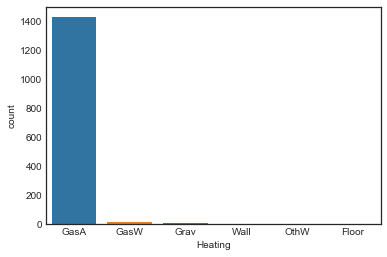

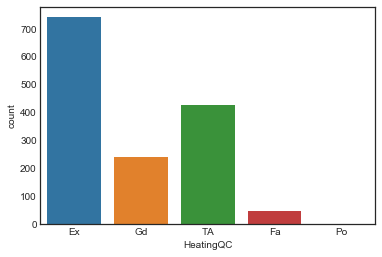

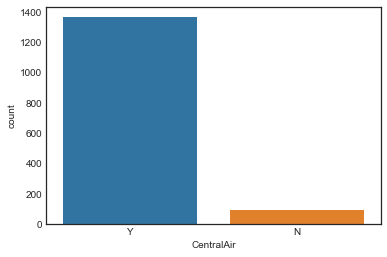

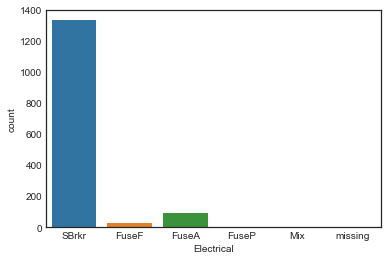

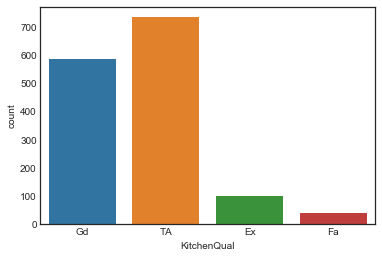

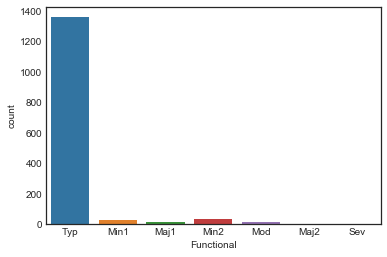

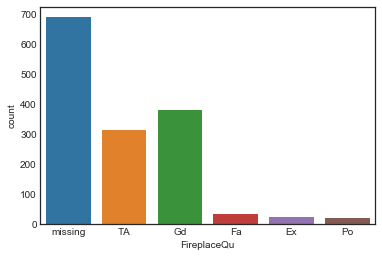

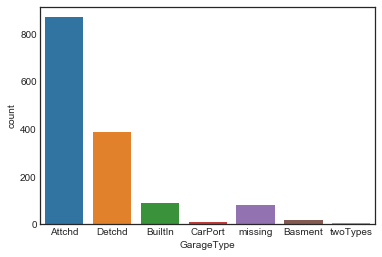

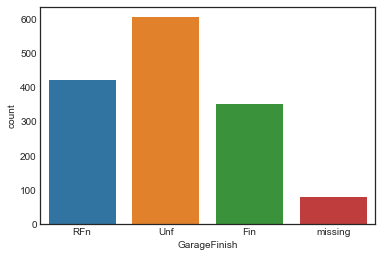

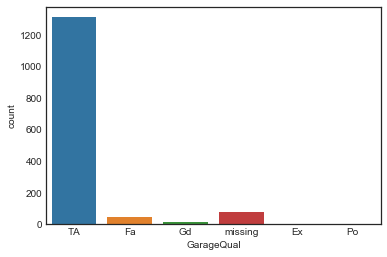

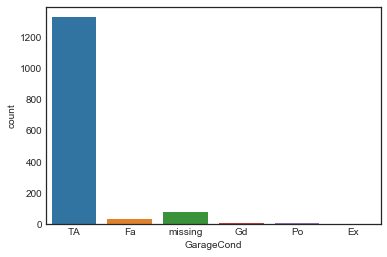

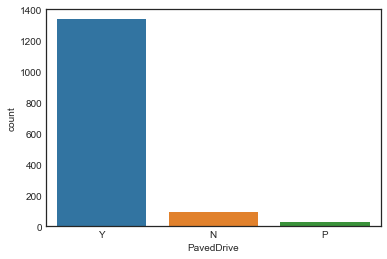

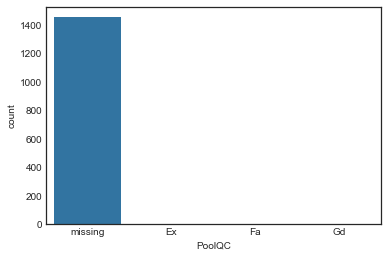

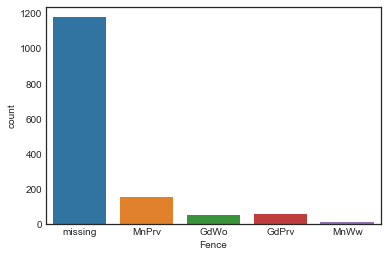

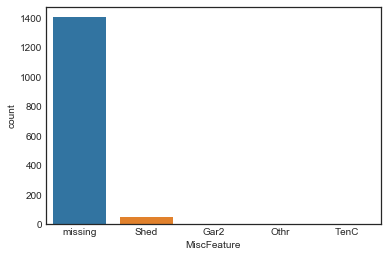

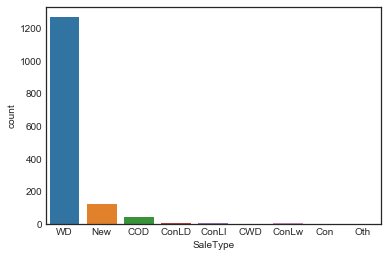

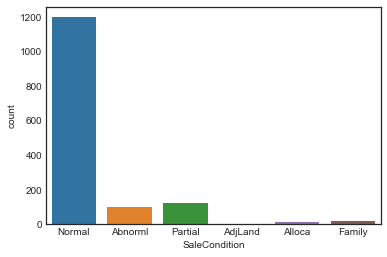

In [79]:
df.rename(columns = {'1stFlrSF':'firstFlrSF', '2ndFlrSF':'secondFlrSF', '3SsnPorch':'threeSsnPorch'}, inplace=True)
df.loc[df.MSZoning=="C (all)", 'MSZoning'] = 'all'
df = category_view(df, df.MSZoning)
df = category_view(df, df.MSSubClass)
df = category_view(df, df.Street)
df = category_view(df, df.Alley)
df = category_view(df, df.LandContour)
df = category_view(df, df.Utilities)
df = category_view(df, df.LotConfig)
df = category_view(df, df.LandSlope)
df = category_view(df, df.Neighborhood)
df = category_view(df, df.Condition1)
df = category_view(df, df.Condition2)

df = category_view(df, df.BldgType)

df.HouseStyle = df.HouseStyle.str.replace(r"[.]", "_") #remove categories with periods and exchange with underscore
df.HouseStyle = 'housestyle_' + df.HouseStyle
df = category_view(df, df.HouseStyle)
df = category_view(df, df.OverallQual)
df = category_view(df, df.OverallCond)

# create new cateogry for year build in terms of decade
#df['yrbuilt_decade'] = (df.YearBuilt // 10) * 10
#df = category_view(df, df.yrbuilt_decade)

#df['garage_decade'] = df.GarageYrBlt // 10 * 10
#df['garage_decade'] = df['garage_decade'].apply(np.int64)
#df = category_view(df, df.garage_decade)

#df = category_view(df, df.RoofStyle)


df.loc[df.RoofMatl=="Tar&Grv", 'RoofMatl'] = 'TarGrv'
df = category_view(df, df.RoofMatl)

df.Exterior1st = df.Exterior1st.str.replace(' ', '')
df = category_view(df, df.Exterior1st)

df.Exterior2nd = df.Exterior2nd.str.replace(' ', '')
df = category_view(df, df.Exterior2nd)
df = category_view(df, df.MasVnrType)
df = category_view(df, df.ExterQual)
#df = category_view(df, df.ExterCond)
df = category_view(df, df.Foundation)
df = category_view(df, df.BsmtQual)
#df = category_view(df, df.BsmtCond)
#df = category_view(df, df.BsmtExposure)
#df = category_view(df, df.BsmtFinType1)
#df = category_view(df, df.BsmtFinType2)
df = category_view(df, df.Heating)
df = category_view(df, df.HeatingQC)
df = category_view(df, df.CentralAir)
df = category_view(df, df.Electrical)
df = category_view(df, df.KitchenQual)
df = category_view(df, df.Functional)
df = category_view(df, df.FireplaceQu)

df.loc[df.GarageType=="2Types", 'GarageType'] = 'twoTypes'
df = category_view(df, df.GarageType)
df = category_view(df, df.GarageFinish)
df = category_view(df, df.GarageQual)
df = category_view(df, df.GarageCond)
df = category_view(df, df.PavedDrive)
df = category_view(df, df.PoolQC)
df = category_view(df, df.Fence)
df = category_view(df, df.MiscFeature)
df = category_view(df, df.SaleType)
df = category_view(df, df.SaleCondition)

### Label Encoding Categorical Variables
We use label encoding to simply convert each value in a cateogircal column to a number. 

1. First we will convert the column to a category to indicate the cateogies that we will use for the label encoder. 
2. Then we will assign an encoded variable to the respective categorical variable in that column

In [80]:
from sklearn.preprocessing import LabelEncoder



def label_encoder():
    cat_vars = ['MSZoning', 'Street', 'Alley','LandContour','Utilities','LotConfig','LandSlope',
            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofMatl',
            'Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','Heating',
            'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
           'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
            'Fence','MiscFeature','SaleType','SaleCondition'
           ]
    for cat in cat_vars:
        lb_make = LabelEncoder()
        df[cat] = lb_make.fit_transform(df[cat])
        
    vars_not_1Hot = [
        'LotShape','RoofStyle','ExterCond','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    ]

    for cat in vars_not_1Hot:
        lb_make = LabelEncoder()
        df[cat] = lb_make.fit_transform(df[cat])

In [81]:
label_encoder()

In [82]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,firstFlrSF,secondFlrSF,...,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypemissing,GarageFinishFin,GarageFinishRFn,GarageFinishUnf,GarageQualEx,GarageQualFa,GarageQualGd,GarageQualPo,GarageQualTA,GarageCondEx,GarageCondFa,GarageCondGd,GarageCondPo,GarageCondTA,PavedDriveN,PavedDriveP,PoolQCEx,PoolQCFa,PoolQCGd,FenceGdPrv,FenceGdWo,FenceMnPrv,FenceMnWw,MiscFeatureGar2,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,SaleTypeCOD,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleConditionAbnorml,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal
0,1,60,2,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,3,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,20,2,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,0,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,60,2,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,3,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,70,2,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,3,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,60,2,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,3,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [92]:
df.dtypes

Id                        int64
MSSubClass                int64
MSZoning                  int64
LotFrontage             float64
LotArea                   int64
Street                    int64
Alley                     int64
LotShape                  int64
LandContour               int64
Utilities                 int64
LotConfig                 int64
LandSlope                 int64
Neighborhood              int64
Condition1                int64
Condition2                int64
BldgType                  int64
HouseStyle                int64
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
RoofStyle                 int64
RoofMatl                  int64
Exterior1st               int64
Exterior2nd               int64
MasVnrType                int64
MasVnrArea              float64
ExterQual                 int64
ExterCond                 int64
Foundation                int64
                         ...   
GarageCo

In [84]:
df.to_csv("ames1.csv")

In [87]:
df.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [85]:
#all_columns = "+".join(df.drop(labels=['Id','SalePrice','LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis=1).columns)
all_columns = " ".join(df.drop(labels=['Id','SalePrice','LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis=1).columns)

In [86]:
all_columns

'MSSubClass MSZoning LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF Heating HeatingQC CentralAir Electrical firstFlrSF secondFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces GarageYrBlt GarageCars GarageArea PavedDrive WoodDeckSF OpenPorchSF EnclosedPorch threeSsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold SaleType SaleCondition MSZoningFV MSZoningRH MSZoningRL MSZoningRM MSSubClass20 MSSubClass30 MSSubClass40 MSSubClass45 MSSubClass50 MSSubClass60 MSSubClass70 MSSubClass75 MSSubClass80 MSSubClass85 MSSubClass90 MSSubClass120 MSSubClass160 MSSubClass180 StreetGrvl AlleyGrvl AlleyPave LandContourBnk LandContourHLS LandContourLow UtilitiesAllPub LotConf

In [280]:
all_columns[:2001]

'MSSubClass+MSZoning+LotArea+Street+LotShape+LandContour+Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+ExterQual+ExterCond+Foundation+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+firstFlrSF+secondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+GarageYrBlt+GarageCars+GarageArea+PavedDrive+WoodDeckSF+OpenPorchSF+EnclosedPorch+threeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+SaleType+SaleCondition+MSZoningFV+MSZoningRH+MSZoningRL+MSZoningRM+MSSubClass20+MSSubClass30+MSSubClass40+MSSubClass45+MSSubClass50+MSSubClass60+MSSubClass70+MSSubClass75+MSSubClass80+MSSubClass85+MSSubClass90+MSSubClass120+MSSubClass160+MSSubClass180+StreetGrvl+AlleyGrvl+AlleyPave+LandContourBnk+LandContourHLS+LandContourLow+UtilitiesAllPub+LotConf

In [88]:
df.Neighborhood.unique()

array([ 5, 24,  6, 15, 11, 21, 14, 17,  3, 19, 16, 12, 20,  9, 10,  7, 23,
        8, 22,  4, 13,  0,  2, 18,  1], dtype=int64)

In [281]:
model = smf.ols(formula='SalePrice ~ ' + all_columns,data = df).fit()
#anova_ = sm.stats.anova_lm(model, typ=1)
#print(anova_)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     59.37
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:53:09   Log-Likelihood:                -16489.
No. Observations:                1459   AIC:                         3.358e+04
Df Residuals:                    1157   BIC:                         3.518e+04
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [93]:
all_columns

'MSSubClass MSZoning LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF Heating HeatingQC CentralAir Electrical firstFlrSF secondFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces GarageYrBlt GarageCars GarageArea PavedDrive WoodDeckSF OpenPorchSF EnclosedPorch threeSsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold SaleType SaleCondition MSZoningFV MSZoningRH MSZoningRL MSZoningRM MSSubClass20 MSSubClass30 MSSubClass40 MSSubClass45 MSSubClass50 MSSubClass60 MSSubClass70 MSSubClass75 MSSubClass80 MSSubClass85 MSSubClass90 MSSubClass120 MSSubClass160 MSSubClass180 StreetGrvl AlleyGrvl AlleyPave LandContourBnk LandContourHLS LandContourLow UtilitiesAllPub LotConf

In [116]:
df['price_log'] = np.log(df.SalePrice)

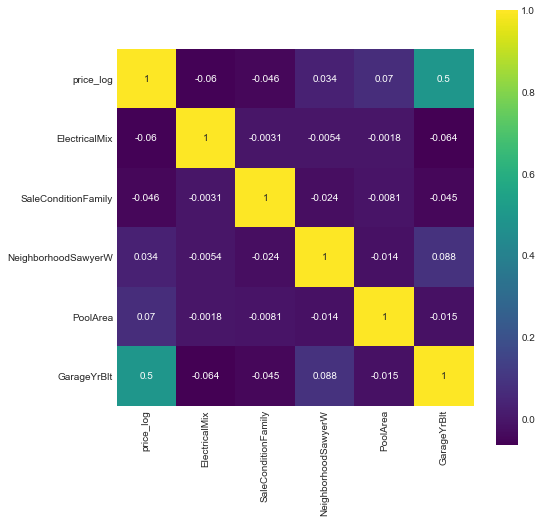

In [102]:
# only quanitiative variables (hard to tall if qualitative predictors are correlatied)
corr_matrix = df[['price_log','ElectricalMix','SaleConditionFamily','NeighborhoodSawyerW',
                  'PoolArea','GarageYrBlt']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')

In [101]:
df.columns[1]

'MSSubClass'

In [119]:
def corr_matrix(i):
    # only quanitiative variables (hard to tall if qualitative predictors are correlatied)
    corr_matrix = df[['price_log', df.columns[i-1],df.columns[i-2],df.columns[i-3],df.columns[i-4],df.columns[i-5],
         df.columns[i-6],df.columns[i-7],df.columns[i-8],df.columns[i-9],df.columns[i-10]]].corr()
    plt.figure(figsize=(8,8))
    sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


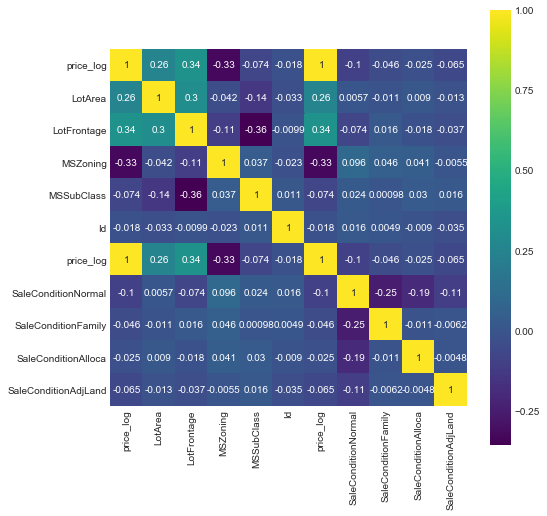

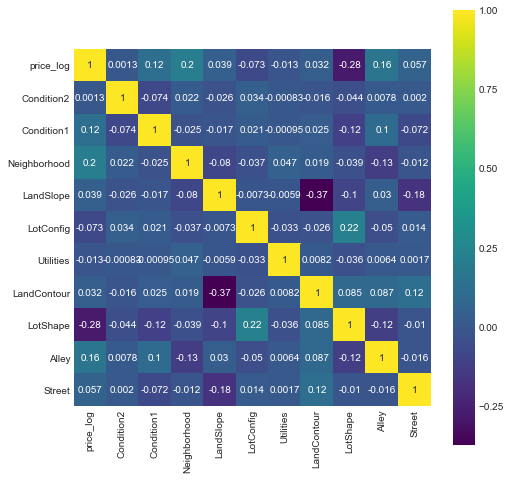

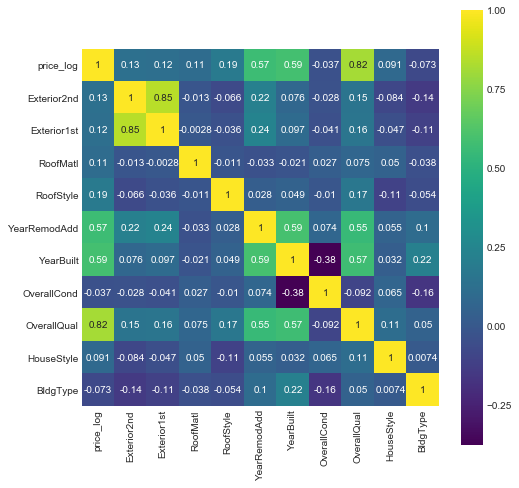

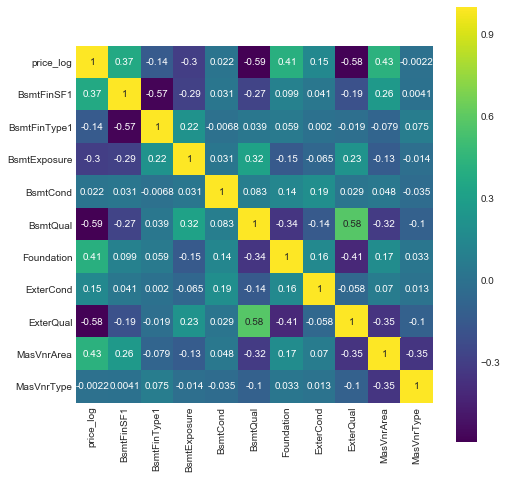

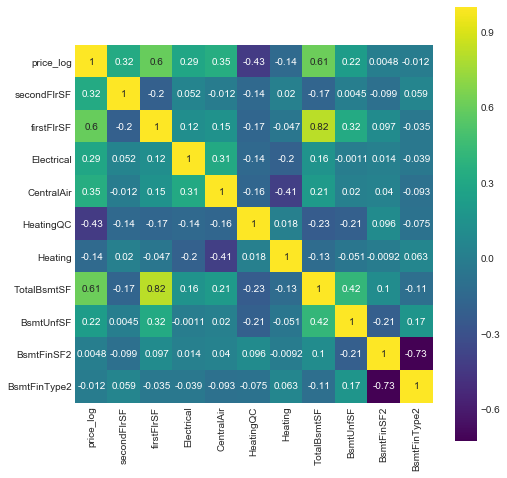

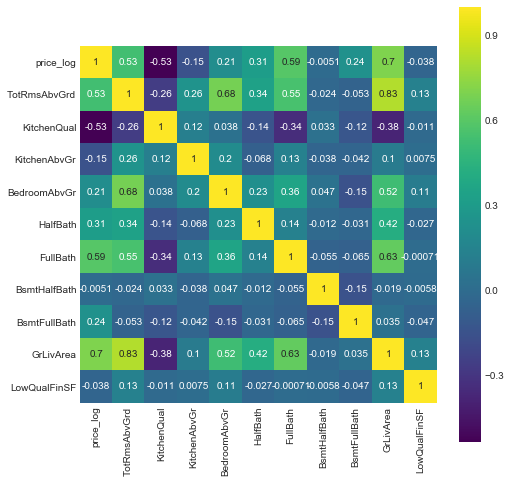

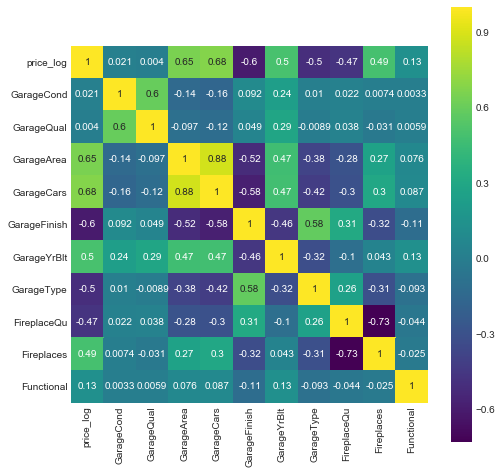

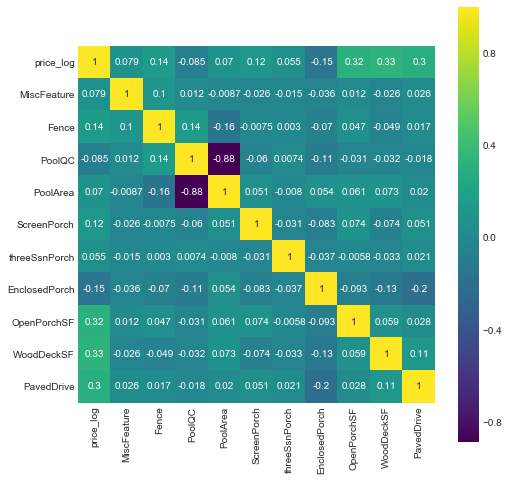

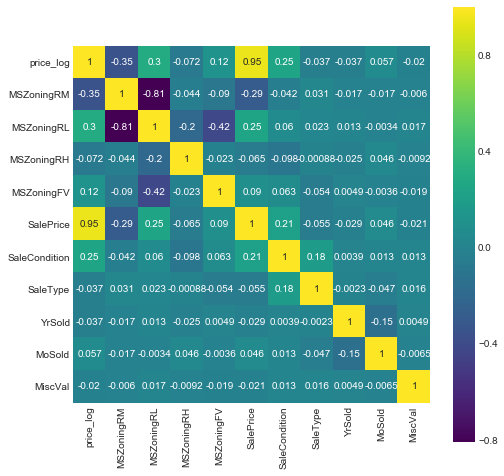

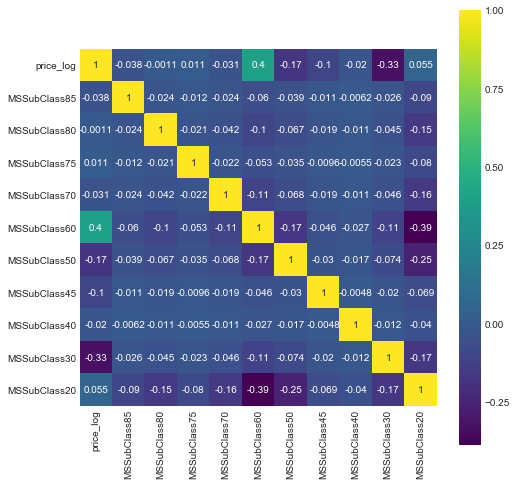

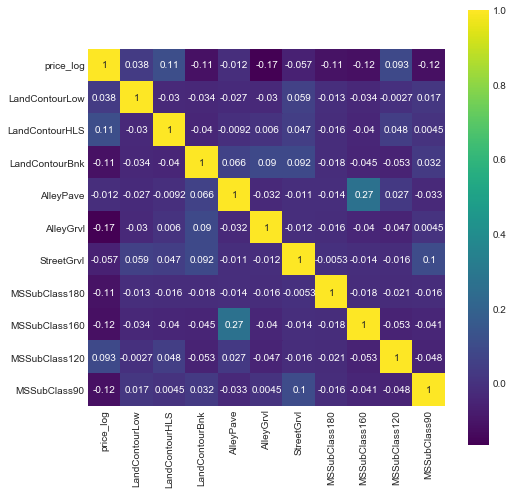

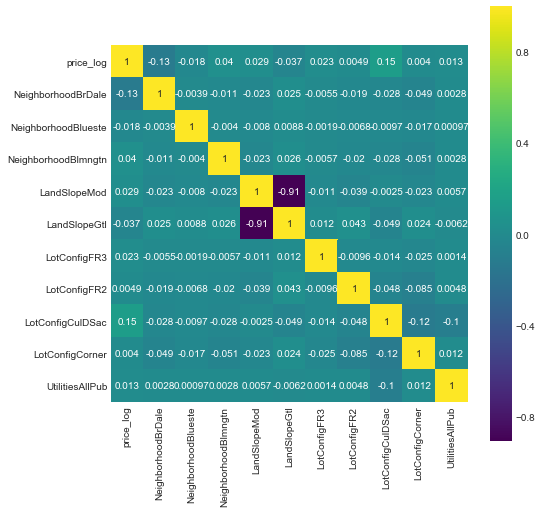

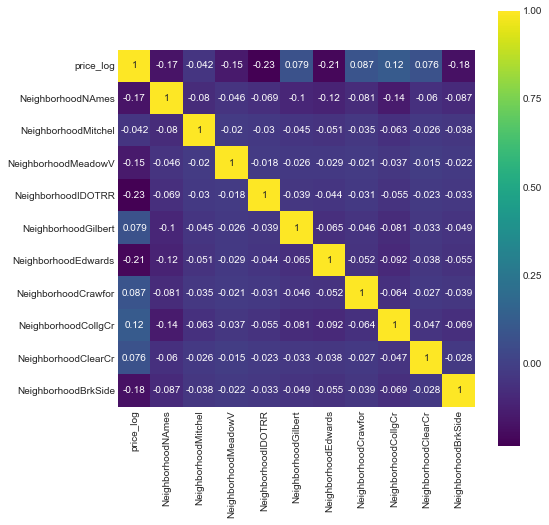

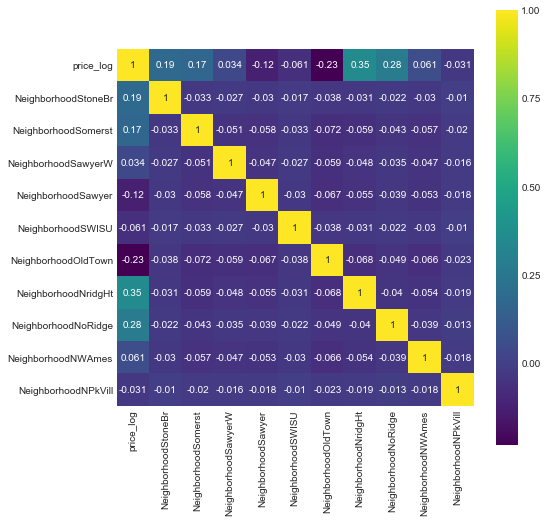

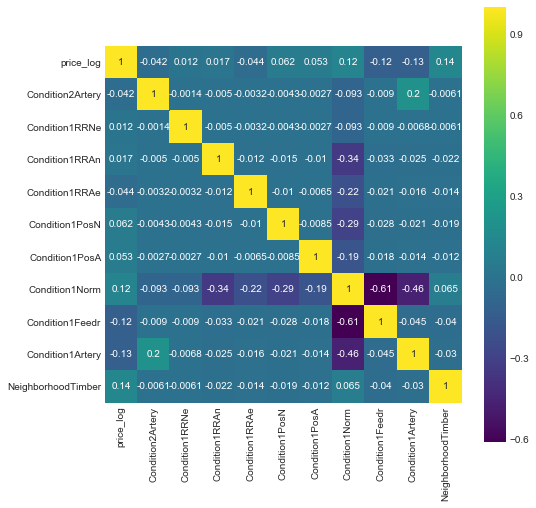

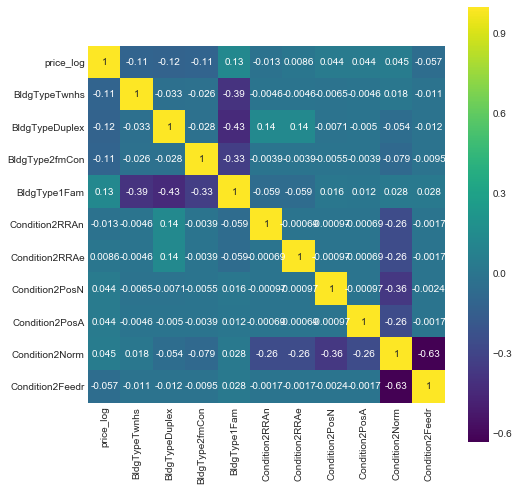

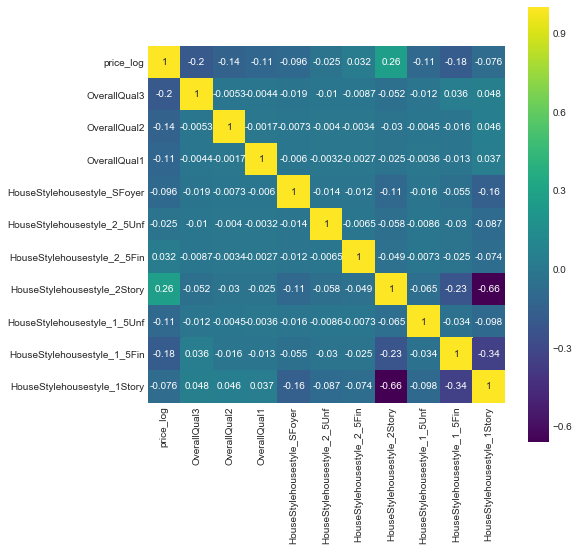

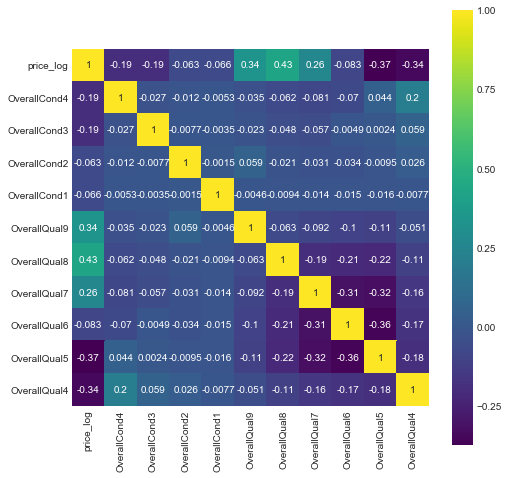

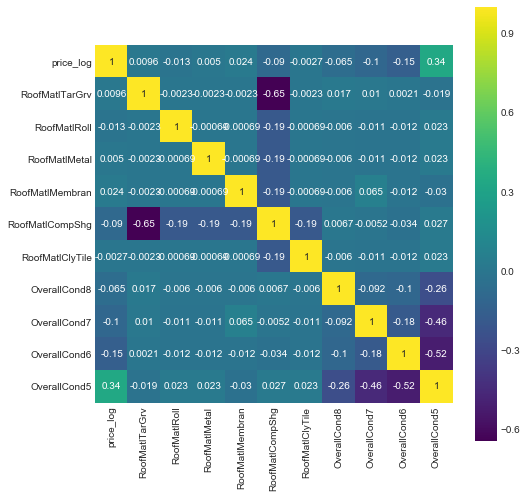

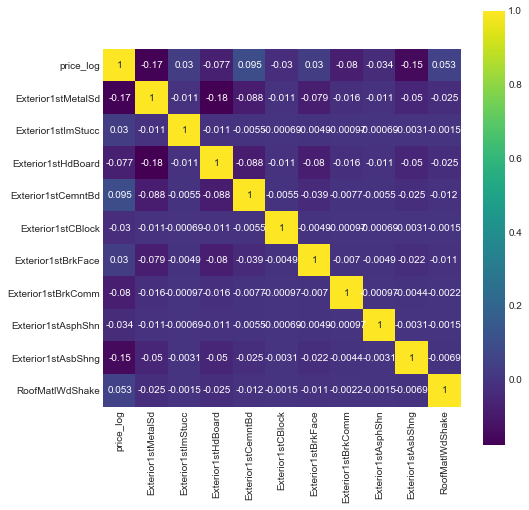

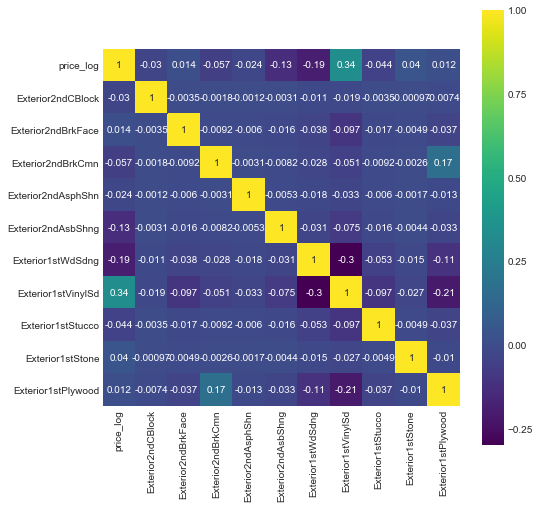

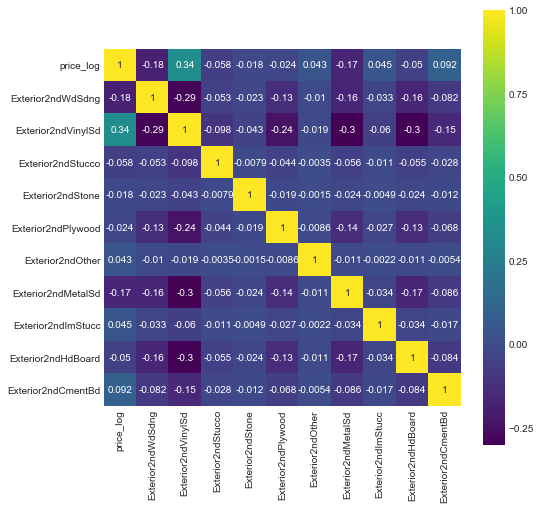

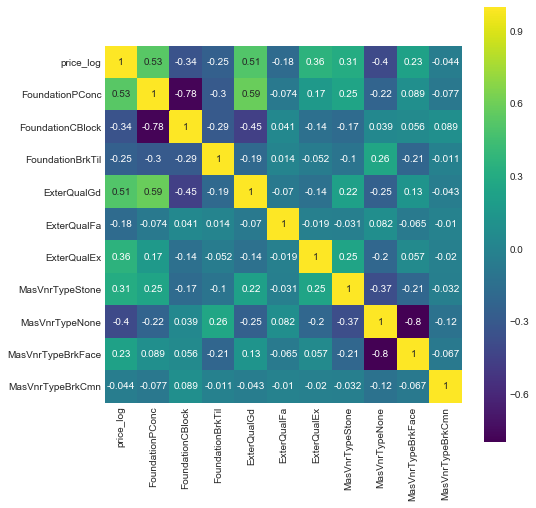

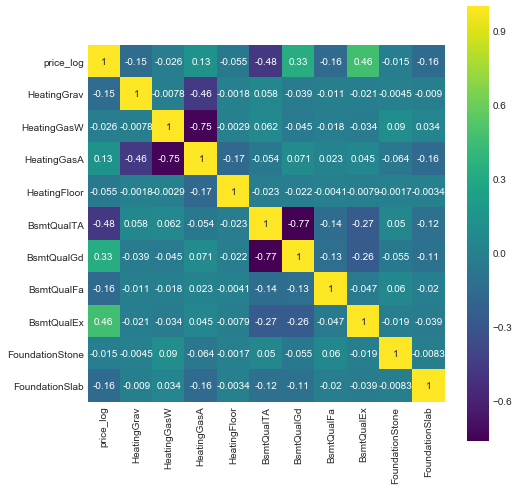

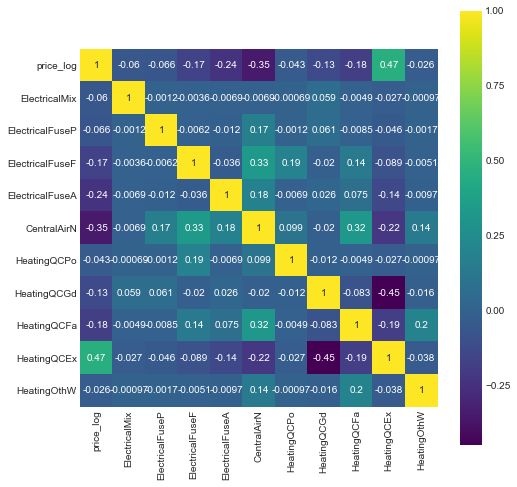

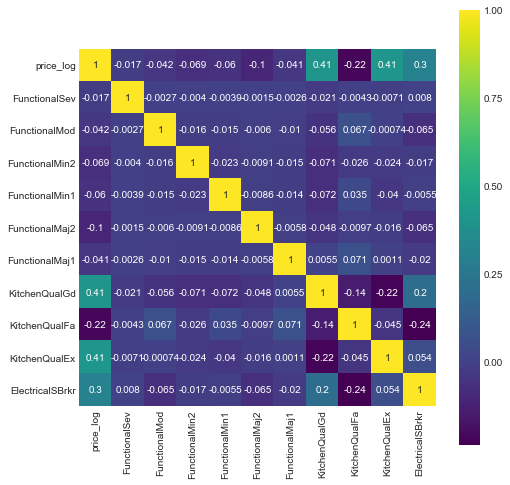

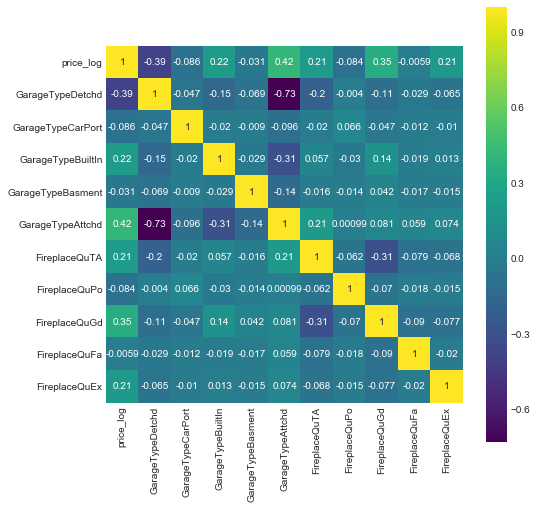

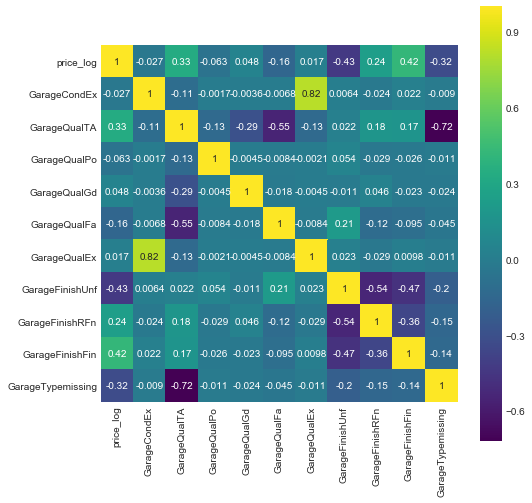

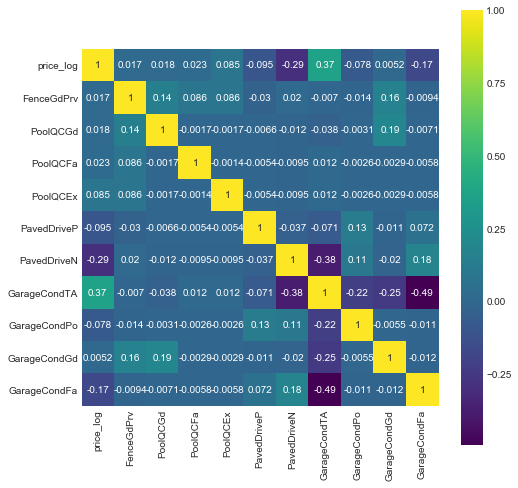

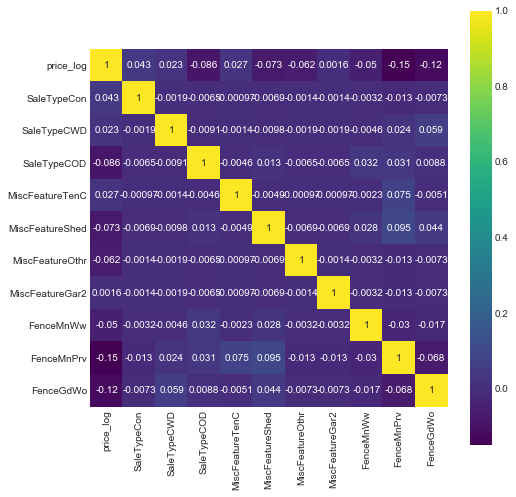

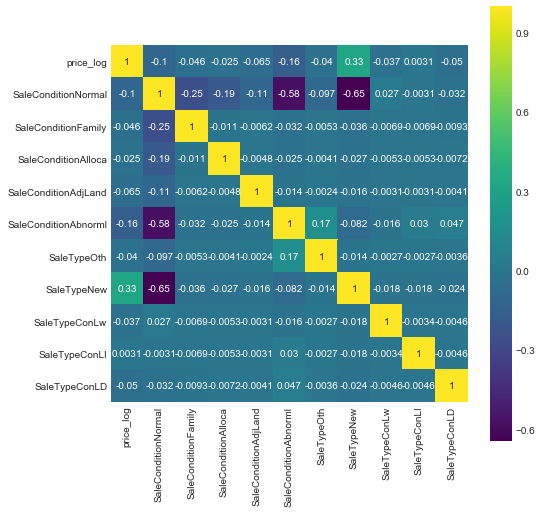

In [120]:
k = len(df.columns)

for i in range(5, k,10):
    corr_matrix(i)
    count += 1

Correlation matrix 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text yticklabel objects>)

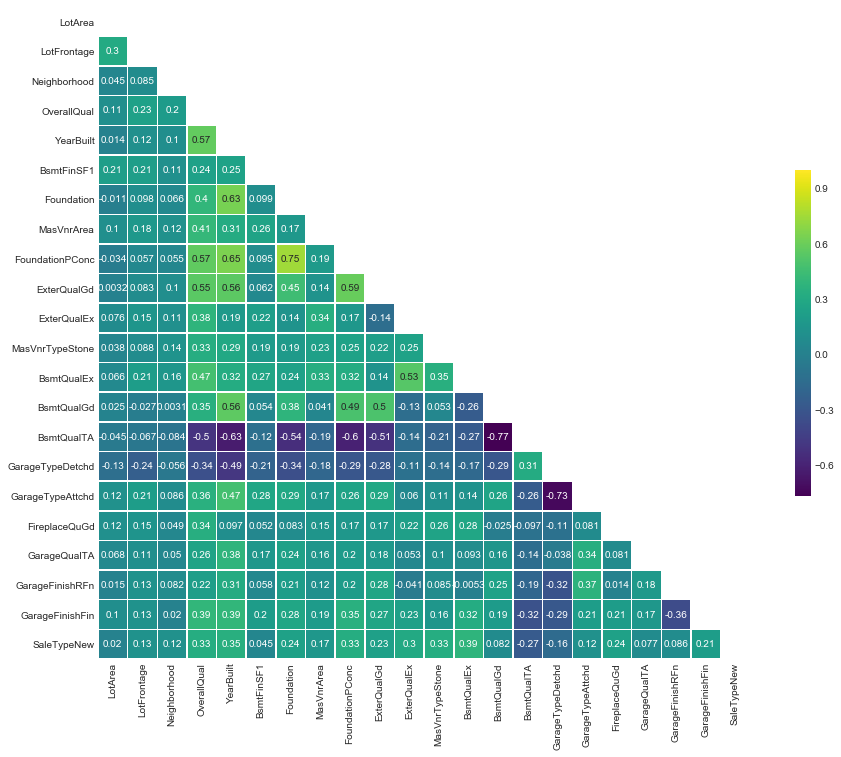

In [183]:
# https://datascientistsblog.wordpress.com/2017/02/16/housing_price/
corr = df[['LotArea','LotFrontage','Neighborhood','OverallQual','YearBuilt','BsmtFinSF1','Foundation','MasVnrArea',
    'FoundationPConc','ExterQualGd','ExterQualEx','MasVnrTypeStone','BsmtQualEx','BsmtQualGd','BsmtQualTA',
    'GarageTypeDetchd','GarageTypeAttchd','FireplaceQuGd','GarageQualTA','GarageFinishRFn','GarageFinishFin',
    'SaleTypeNew']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap='viridis', vmax = 1, annot=True, square = True,
           linewidths = .5, cbar_kws= {"shrink": .5}, ax=ax)

plt.xticks(rotation = 90)
plt.yticks(rotation=0)

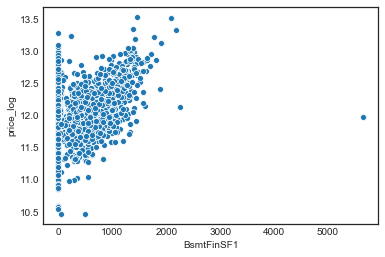

In [147]:
sns.scatterplot(x = df.BsmtFinSF1, y = df.price_log)

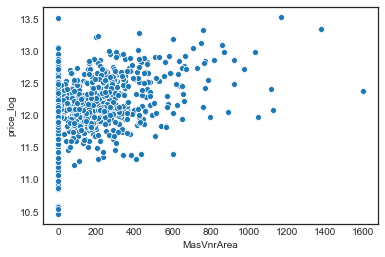

In [127]:
sns.scatterplot(x = df.MasVnrArea, y = df.price_log)

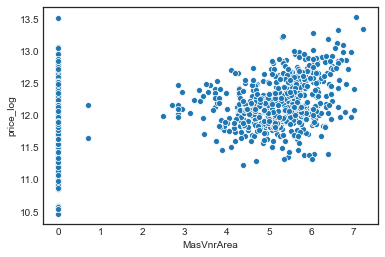

In [141]:
sns.scatterplot(x = np.log(df[df.MasVnrArea<1600].MasVnrArea+1), y = df.price_log)

In [139]:
df[df.MasVnrArea<12000].MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
df.GarageType

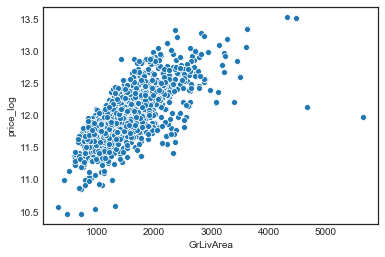

In [148]:
sns.scatterplot(x = df.GrLivArea, y = df.price_log)

In [149]:
df[df.GrLivArea >4000][['GrLivArea']]

,GrLivArea
523,4676
691,4316
1182,4476
1298,5642


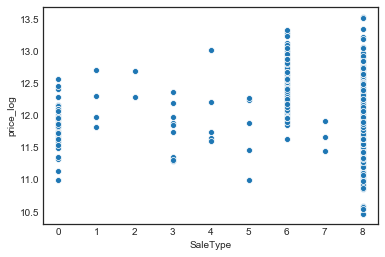

In [175]:
sns.scatterplot(x = df.SaleType, y = df.price_log)

In [ ]:
df.d

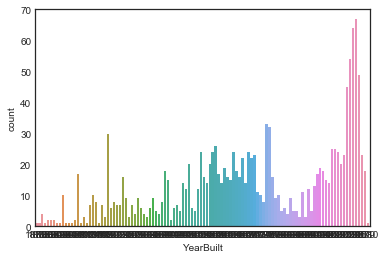

In [162]:
sns.countplot(df.YearBuilt)

In [154]:
df[df.LotFrontage >100000][['LotArea','GrLivArea']]

,LotArea,GrLivArea
249,159000,2144
313,215245,2036
335,164660,1786
706,115149,1824


In [168]:
df['built_decade'] = df.YearBuilt // 10 * 10
df['built_decade'] = df['built_decade'].apply(np.int64)

In [176]:
df.Neighborhood.unique()

array([ 5, 24,  6, 15, 11, 21, 14, 17,  3, 19, 16, 12, 20,  9, 10,  7, 23,
        8, 22,  4, 13,  0,  2, 18,  1], dtype=int64)